# Линейная регрессия Theano

In [1]:
import numpy as np

In [2]:
import theano
import theano.tensor as T

Using gpu device 0: Tesla K40c (CNMeM is disabled, cuDNN 5005)


In [3]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

## Создание обучающей выборки 

Число объектов в обучающей выборке

In [4]:
N = 100

Размерность пространства

In [5]:
d = 1

In [6]:
X_train = np.linspace(0,100,N).reshape(N,1)

In [7]:
y_train = X_train[:,0] + 10*np.random.randn(100)

### Описание модели

In [8]:
x = T.dmatrix("x")
y = T.dvector("y")

In [9]:
w = theano.shared(np.random.randn(d), name="w")
b = theano.shared(0., name="b")

In [10]:
p_y = T.dot(x, w) + b   

### Создание целевой функции

In [11]:
loss =T.sum(T.pow(p_y-y,2))/(2*N)

### Производная для w и b

In [12]:
gw, gb = T.grad(loss, [w, b]) 

### Создание функции обучения

In [13]:
train = theano.function(
          inputs=[x,y],
          outputs=[loss],
          updates=((w, w - 0.0001 * gw), (b, b - 0.0001 * gb)))

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


### Функция предсказания модели

In [14]:
predict = theano.function(inputs=[x], outputs=p_y)

## Обучение модели

Epoch: 0, loss: [array(7481.876731860322)]
Epoch: 1, loss: [array(3343.8306999202896)]
Epoch: 2, loss: [array(1514.3865738400857)]
Epoch: 3, loss: [array(705.5831367703727)]
Epoch: 4, loss: [array(348.00839071962844)]
Epoch: 5, loss: [array(189.92337086883188)]
Epoch: 6, loss: [array(120.03343180888582)]
Epoch: 7, loss: [array(89.1348354309858)]
Epoch: 8, loss: [array(75.4744431633641)]
Epoch: 9, loss: [array(69.43511907467848)]
Epoch: 10, loss: [array(66.76509493310492)]
Epoch: 11, loss: [array(65.58464966303347)]
Epoch: 12, loss: [array(65.06275223703285)]
Epoch: 13, loss: [array(64.83200103498278)]
Epoch: 14, loss: [array(64.72996656145942)]
Epoch: 15, loss: [array(64.68483818869551)]
Epoch: 16, loss: [array(64.66486819595279)]
Epoch: 17, loss: [array(64.65602080881456)]
Epoch: 18, loss: [array(64.65209076407133)]
Epoch: 19, loss: [array(64.65033469392912)]


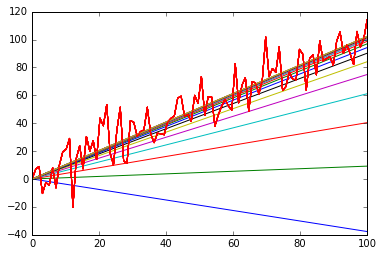

In [15]:
train_loss = []
for i in range(20):
    e_loss = train(X_train, y_train) # Обновление весов
    train_loss.append(e_loss)
    print("Epoch: {}, loss: {}".format(i,e_loss))
    pr = predict(X_train)
    plt.plot(X_train, pr)
    plt.plot(X_train, y_train, c='r')

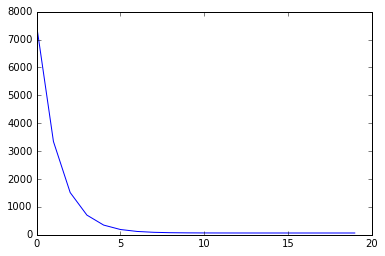

In [17]:
plt.plot(range(0,len(train_loss)),train_loss)
plt.show()